In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PS08 Galaxy Shape Model

In [2]:
from galaxy_shapes.shape_models.shape_model_componenets import PS08Shapes
elliptical_model_all = PS08Shapes(morphology='elliptical', sample='all')
elliptical_model_1 = PS08Shapes(morphology='elliptical', sample='luminosity_sample_1')
elliptical_model_2 = PS08Shapes(morphology='elliptical', sample='luminosity_sample_2')
elliptical_model_3 = PS08Shapes(morphology='elliptical', sample='luminosity_sample_3')
elliptical_model_4 = PS08Shapes(morphology='elliptical', sample='luminosity_sample_4')

In [3]:
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
orientation_model = RandomAlignment()

In [4]:
from galaxy_shapes.shape_models.shape_model_componenets import ProjectedShapes
projected_shape_model = ProjectedShapes()

In [30]:
def obs_func(shape_model, orientation_model, projected_shape_model, mag_lim, morphology='elliptical', size=1e5, extinction_model=None):
    size=int(size)
    b_to_a = shape_model.assign_b_to_a(size=size)
    c_to_a, b_to_a, c_to_b = shape_model.assign_c_to_a(b_to_a=b_to_a)
    major_v, inter_v, minor_v = orientation_model.assign_orientation(size=size)
    proj_b_to_a, theta = projected_shape_model.assign_projected_b_to_a(minor_axis=minor_v,
                                              inter_axis=inter_v,
                                              major_axis=major_v,
                                              b_to_a = b_to_a,
                                              c_to_a = c_to_a)
    mag = d.rvs(m_max=mag_lim, size=size)
    if morphology=='spiral':
        y = c_to_a
        dm = extinction_model.extinction_model(theta, y)
    else:
        dm = np.zeros(size)
    mag = mag + dm
    return proj_b_to_a, mag

In [8]:
proj_b_to_a_all, m = obs_func(elliptical_model_all, orientation_model, projected_shape_model, mag_lim=-17)
proj_b_to_a_1, m  = obs_func(elliptical_model_1, orientation_model, projected_shape_model, mag_lim=-17)
proj_b_to_a_2, m  = obs_func(elliptical_model_2, orientation_model, projected_shape_model, mag_lim=-19)
proj_b_to_a_3, m  = obs_func(elliptical_model_3, orientation_model, projected_shape_model, mag_lim=-20)
proj_b_to_a_4, m  = obs_func(elliptical_model_4, orientation_model, projected_shape_model, mag_lim=-21)

In [9]:
# calculate the distribution of shapes
bins = np.linspace(0,1,20)

e = 1 - proj_b_to_a_all
counts_all = np.histogram(e, bins=bins)[0]
counts_all = counts_all/np.sum(counts_all)/np.diff(bins)

e = 1 - proj_b_to_a_1
counts_1 = np.histogram(e, bins=bins)[0]
counts_1 = counts_1/np.sum(counts_1)/np.diff(bins)

e = 1 - proj_b_to_a_2
counts_2 = np.histogram(e, bins=bins)[0]
counts_2 = counts_2/np.sum(counts_2)/np.diff(bins)

e = 1 - proj_b_to_a_3
counts_3 = np.histogram(e, bins=bins)[0]
counts_3 = counts_3/np.sum(counts_3)/np.diff(bins)

e = 1 - proj_b_to_a_4
counts_4 = np.histogram(e, bins=bins)[0]
counts_4 = counts_4/np.sum(counts_4)/np.diff(bins)

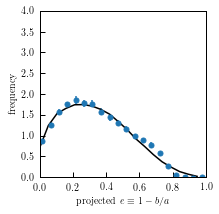

In [10]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_4.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_all, color='black')
p1 = ax.errorbar(x, y, yerr=err, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

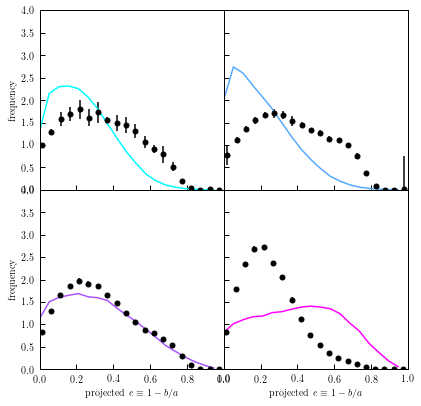

In [11]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_5a.dat', format='ascii')
x1 = 1-t['b/a']
y1 = t['normalized_frequency']
err1 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../data/PS08/figure_5b.dat', format='ascii')
x2 = 1-t['b/a']
y2 = t['normalized_frequency']
err2 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../data/PS08/figure_5c.dat', format='ascii')
x3 = 1-t['b/a']
y3 = t['normalized_frequency']
err3 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../data/PS08/figure_5d.dat', format='ascii')
x4 = 1-t['b/a']
y4 = t['normalized_frequency']
err4 = np.fabs(t['error_+'] - t['error_-'])/2.0

colors = plt.cm.cool(np.linspace(0,1,4))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6.6,6.6))
fig.subplots_adjust(hspace=0, wspace=0)

l1, = ax1.plot(bins[:-1], counts_1, color=colors[0])
p1 = ax1.errorbar(x1, y1, yerr=err1, fmt='o', ms=5, color='black')
ax1.set_xlim([0,1])
ax1.set_ylim([0,4])
ax1.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax1.set_ylabel('frequency')

l1, = ax2.plot(bins[:-1], counts_2, color=colors[1])
p1 = ax2.errorbar(x2, y2, yerr=err2, fmt='o', ms=5, color='black')
ax2.set_xlim([0,1])
ax2.set_ylim([0,4])
#ax2.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
#ax2.set_ylabel('frequency')

l1, = ax3.plot(bins[:-1], counts_3, color=colors[2])
p1 = ax3.errorbar(x3, y3, yerr=err3, fmt='o', ms=5, color='black')
ax3.set_xlim([0,1])
ax3.set_ylim([0,4])
ax3.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax3.set_ylabel('frequency')

l1, = ax4.plot(bins[:-1], counts_4, color=colors[3])
p1 = ax4.errorbar(x4, y4, yerr=err4, fmt='o', ms=5, color='black')
ax4.set_xlim([0,1])
ax4.set_ylim([0,4])
ax4.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
#ax4.set_ylabel('frequency')

plt.show()

In [31]:
from galaxy_shapes.shape_models.shape_model_componenets import PS08Shapes
spiral_model_all= PS08Shapes(morphology='spiral', sample='all')
spiral_model_1  = PS08Shapes(morphology='spiral', sample='luminosity_sample_1')
spiral_model_2  = PS08Shapes(morphology='spiral', sample='luminosity_sample_2')
spiral_model_3  = PS08Shapes(morphology='spiral', sample='luminosity_sample_3')
spiral_model_4  = PS08Shapes(morphology='spiral', sample='luminosity_sample_4')

In [32]:
from astro_utils.schechter_functions import MagSchechter
from lss_observations.luminosity_functions import Blanton_2003_phi

phi = Blanton_2003_phi()
d = MagSchechter(phi.phi0, phi.x0, phi.alpha0)

from galaxy_shapes.shape_models.shape_model_componenets import PS08DustExtinction
extinction_model_all = PS08DustExtinction(gal_type='centrals', sample='all')
extinction_model_1 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_1')
extinction_model_2 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_2')
extinction_model_3 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_3')
extinction_model_4 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_4')

In [33]:
proj_b_to_a_all, m_all = obs_func(spiral_model_all, orientation_model, projected_shape_model, mag_lim=-17, morphology='spiral', extinction_model=extinction_model_all)
proj_b_to_a_1, m_1 = obs_func(spiral_model_1, orientation_model, projected_shape_model, mag_lim=-17, morphology='spiral', extinction_model=extinction_model_1)
proj_b_to_a_2, m_2 = obs_func(spiral_model_2, orientation_model, projected_shape_model, mag_lim=-19, morphology='spiral', extinction_model=extinction_model_2)
proj_b_to_a_3, m_3 = obs_func(spiral_model_3, orientation_model, projected_shape_model, mag_lim=-20, morphology='spiral', extinction_model=extinction_model_3)
proj_b_to_a_4, m_4 = obs_func(spiral_model_4, orientation_model, projected_shape_model, mag_lim=-21, morphology='spiral', extinction_model=extinction_model_4)

In [34]:
# calculate the distribution of shapes
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

e = 1 - proj_b_to_a_all
mask = (m_all < -17)
counts_all = np.histogram(e[mask], bins=bins)[0]
counts_all = counts_all/np.sum(counts_all)/np.diff(bins)
counts_allall = np.histogram(e, bins=bins)[0]
counts_allall = counts_allall/np.sum(counts_allall)/np.diff(bins)

e = 1 - proj_b_to_a_1
mask = (m_1 < -17)
counts_1 = np.histogram(e[mask], bins=bins)[0]
counts_1 = counts_1/np.sum(counts_1)/np.diff(bins)
counts_11 = np.histogram(e, bins=bins)[0]
counts_11 = counts_11/np.sum(counts_11)/np.diff(bins)

e = 1 - proj_b_to_a_2
mask = (m_2 < -19)
counts_2 = np.histogram(e[mask], bins=bins)[0]
counts_2 = counts_2/np.sum(counts_2)/np.diff(bins)
counts_22 = np.histogram(e, bins=bins)[0]
counts_22 = counts_22/np.sum(counts_22)/np.diff(bins)

e = 1 - proj_b_to_a_3
mask = (m_3 < -20)
counts_3 = np.histogram(e[mask], bins=bins)[0]
counts_3 = counts_3/np.sum(counts_3)/np.diff(bins)
counts_33 = np.histogram(e, bins=bins)[0]
counts_33 = counts_33/np.sum(counts_33)/np.diff(bins)

e = 1 - proj_b_to_a_4
mask = (m_4 < -21)
counts_4 = np.histogram(e[mask], bins=bins)[0]
counts_4 = counts_4/np.sum(counts_4)/np.diff(bins)
counts_44 = np.histogram(e, bins=bins)[0]
counts_44 = counts_44/np.sum(counts_44)/np.diff(bins)

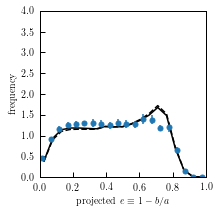

In [35]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_7.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bin_centers, counts_all, color='black')
l1, = ax.plot(bin_centers, counts_allall, '--', color='black')
p1 = ax.errorbar(x, y, yerr=err, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

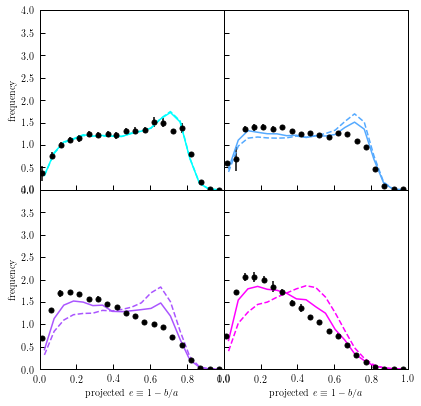

In [36]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_8a.dat', format='ascii')
x1 = 1-t['b/a']
y1 = t['normalized_frequency']
err1 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../data/PS08/figure_8b.dat', format='ascii')
x2 = 1-t['b/a']
y2 = t['normalized_frequency']
err2 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../data/PS08/figure_8c.dat', format='ascii')
x3 = 1-t['b/a']
y3 = t['normalized_frequency']
err3 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../data/PS08/figure_8d.dat', format='ascii')
x4 = 1-t['b/a']
y4 = t['normalized_frequency']
err4 = np.fabs(t['error_+'] - t['error_-'])/2.0

colors = plt.cm.cool(np.linspace(0,1,4))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6.6,6.6))
fig.subplots_adjust(hspace=0, wspace=0)

l1, = ax1.plot(bin_centers, counts_1, color=colors[0])
l1, = ax1.plot(bin_centers, counts_11, '--', color=colors[0])
p1 = ax1.errorbar(x1, y1, yerr=err1, fmt='o', ms=5, color='black')
ax1.set_xlim([0,1])
ax1.set_ylim([0,4])
ax1.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax1.set_ylabel('frequency')

l1, = ax2.plot(bin_centers, counts_2, color=colors[1])
l1, = ax2.plot(bin_centers, counts_22, '--', color=colors[1])
p1 = ax2.errorbar(x2, y2, yerr=err2, fmt='o', ms=5, color='black')
ax2.set_xlim([0,1])
ax2.set_ylim([0,4])
#ax2.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
#ax2.set_ylabel('frequency')

l1, = ax3.plot(bin_centers, counts_3, color=colors[2])
l1, = ax3.plot(bin_centers, counts_33, '--', color=colors[2])
p1 = ax3.errorbar(x3, y3, yerr=err3, fmt='o', ms=5, color='black')
ax3.set_xlim([0,1])
ax3.set_ylim([0,4])
ax3.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax3.set_ylabel('frequency')

l1, = ax4.plot(bin_centers, counts_4, color=colors[3])
l1, = ax4.plot(bin_centers, counts_44, '--', color=colors[3])
p1 = ax4.errorbar(x4, y4, yerr=err4, fmt='o', ms=5, color='black')
ax4.set_xlim([0,1])
ax4.set_ylim([0,4])
ax4.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
#ax4.set_ylabel('frequency')

plt.show()